# EMU Plotting and Analysis Tool Example: Adjoint Tool

## Load Modules

In [199]:
import netCDF4 as nc
import numpy as np
import xarray as xr
import warnings
from eofs.xarray import Eof
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import gridspec
import datetime
import seaborn as sns
import cmocean as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from scipy.stats import linregress
import matplotlib.patches as mpatches
import scipy.io as sio
import matplotlib.colors as mcolors
import matplotlib.patches as patch
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from proj_utils import *
fig_path      = '../figures'

In [288]:
## Load modules
import runpy
# The following are needed to load the plotting tool as a module
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept
sys.path.append('/home/jovyan/ECCOv4-py')
import ecco_v4_py as ecco

In [289]:
path = '/efs_ecco/lenders/run_north_face/emu_adj_96_108_5_trxWa_north_face.bin_1/output/adxx_tauu.0000000129.data'

In [290]:
a = np.fromfile(path,'>f4')

In [291]:
nx = 90
ny = 1170
a = a.reshape(-1,ny,nx)
a_tiles = ecco.llc_compact_to_tiles(a)

llc_compact_to_faces: dims, llc  (472, 1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (472, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


In [292]:
a_tiles.shape

(472, 13, 90, 90)

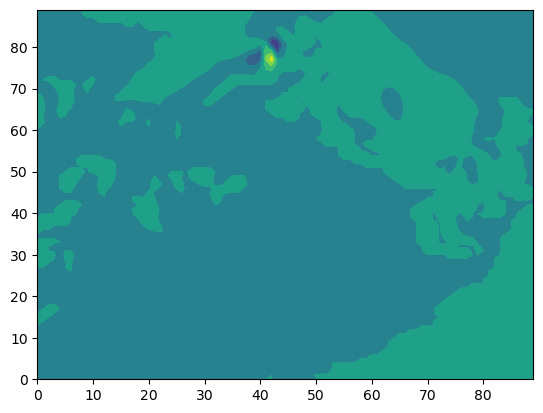

In [293]:
plt.contourf(a_tiles[470,10,:,:])

In [294]:
s3, credentials = init_S3FileSystem(use_earthdata=False, requester_pays=True)
mzz_local_directory = Path('/efs_ecco/mzz-jsons-V4r5/MZZ_mon_mean_native')

In [295]:
mzz_local_file= mzz_local_directory / 'OCEAN_VELOCITY_mon_mean_native_llc090_ECCOV4r5.json' # Pull monthly velocity 
fs = fsspec.filesystem("reference",     
                       fo=str(mzz_local_file),
                       remote_protocol="s3",
                       remote_options={"anon":False, "requester_pays":True},
                       skip_instance_cache=True)
# 
fs.asynchronous = True
store = zarr.storage.FsspecStore(fs)
ds = xr.open_dataset(store, engine='zarr',
                     consolidated=False, chunks={'time':4, 'Z':50})

In [296]:
bathy_path = user_home_dir + '/efs_ecco/ECCO/V4/r5/netcdf/native/geometry/GRID_GEOMETRY_ECCO_V4r5_native_llc0090.nc'
ds_bathy   = xr.open_dataset(bathy_path).Depth
ds_geom    = xr.open_dataset(bathy_path)

In [309]:
new_grid_delta_lat = 1
new_grid_delta_lon = 1

new_grid_min_lat = -90
new_grid_max_lat = 90

new_grid_min_lon = -180
new_grid_max_lon = 180

new_grid_lon_centers, new_grid_lat_centers,\
new_grid_lon_edges, new_grid_lat_edges,\
field_nearest_1deg =\
        ecco.resample_to_latlon(ds.XC, \
                                ds.YC, \
                                a_tiles[240,:,:],\
                                new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,\
                                new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,\
                                fill_value = np.nan, \
                                mapping_method = 'nearest_neighbor',
                                radius_of_influence = 120000)

In [310]:
### --- Open Bathy ---
bathy_path = user_home_dir + '/efs_ecco/ECCO/V4/r5/netcdf/latlon/geometry/GRID_GEOMETRY_ECCO_V4r4_latlon_0p50deg.nc'
ds_bathy   = xr.open_dataset(bathy_path).Depth

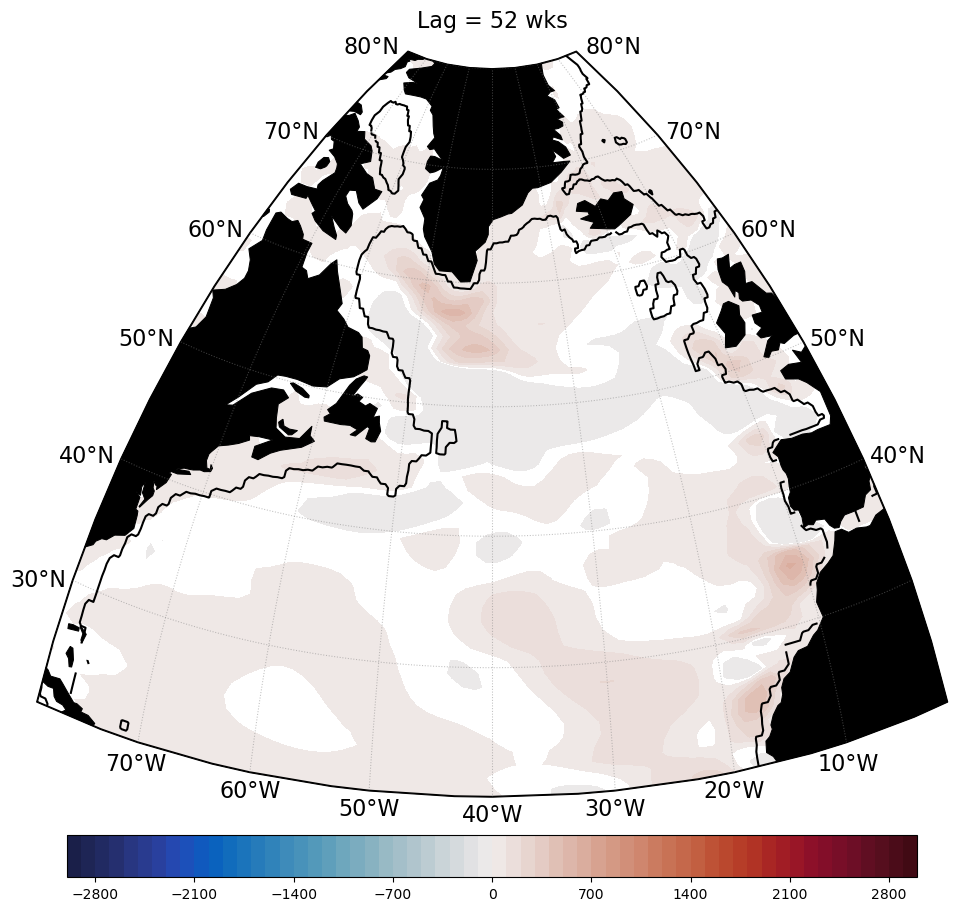

In [311]:
#save_name    = 'surface_temperature_test'
from mapping_utils import *
max_val = 3000
plt_var = field_nearest_1deg
plt_var[plt_var>max_val] = max_val
plt_var[plt_var<-max_val] = -max_val
bbox          = [-80,0,20,80] # Plotting Extent
plot_this_box = [-80,0,0,60]    # Locator box indicating a region
proj          = ccrs.PlateCarree() # Need to add this to most things as "transform=proj"
fig,ax,_      = init_orthomap(1,1,bbox)

# Add Coasts/Continent
ax     = add_coast_grid(ax,bbox,fill_color='k',line_color='k')
levels = np.linspace(-3000,3000,61)

# Plot contours
colorplot = plt.contourf(new_grid_lon_centers,new_grid_lat_centers,field_nearest_1deg, levels=levels, cmap='cmo.balance', zorder=0,transform = proj)
cbar = plt.colorbar(colorplot, fraction=0.057, pad=0.01, orientation='horizontal')
#cbar.set_label('SST [$˚C$]', size='16', labelpad=11)
plt.title('Lag = 52 wks', fontsize = 16)
plt.contour(ds_bathy.longitude,ds_bathy.latitude,ds_bathy,levels = [1000],colors='k',transform = proj)
#plt.contour(ds_bathy.longitude,ds_bathy.latitude,ds_bathy,levels = [1000],colors='k',transform = proj)
#plt.scatter(vels_N.longitude,np.repeat(vels_N.latitude,len(vels_N.longitude)),transform = proj)
#cbar.ax.tick_params(labelsize=16)
#ax.add_patch(patch.Rectangle((-56,40),11,8,facecolor='None',edgecolor='k',linewidth=2,transform=proj))
#plt.savefig(fig_path  + save_name + '.png', format='png', bbox_inches="tight",dpi=100)

In [286]:
200000/

2325.5813953488373

In [66]:
a_north_atlantic = a_tiles[:,10,:,:]

In [ ]:
plt.contourf(a_north_atlantic[])

llc_compact_to_faces: dims, llc  (472, 1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (472, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


(<Figure size 900x789 with 17 Axes>,
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

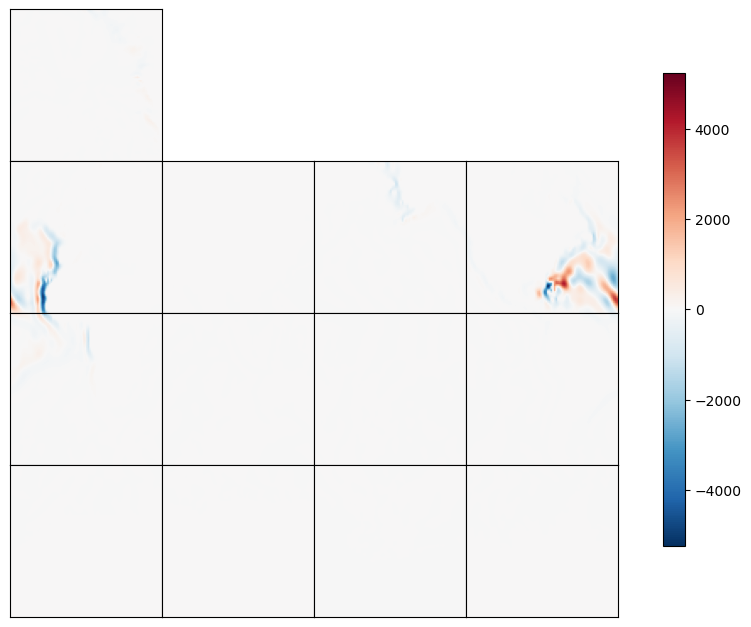

In [63]:
a_tiles = ecco.llc_compact_to_tiles(a)
ecco.plot_tiles(a_tiles[-24],rotate_to_latlon=True,layout='latlon',show_tile_labels=False,show_colorbar=True)

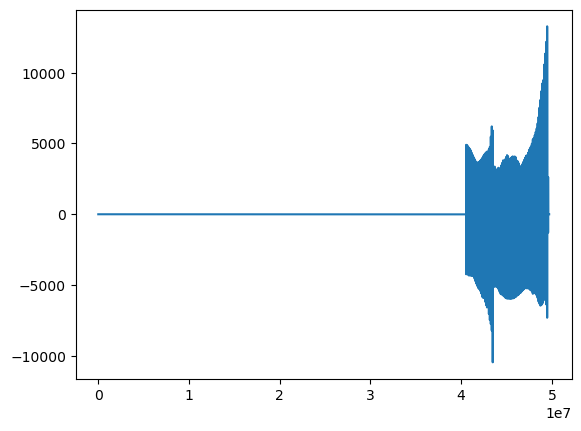

In [29]:
import matplotlib.pyplot as plt
plt.plot(a)

## Invoking the Tool
Invoking the tool is the same across all EMU tools. The tool determines what to plot based on the user-specified EMU run directory name. For example, 'emu_samp...' corresponds to the Sampling Tool, while 'emu_fgrd...' corresponds to the Forward Gradient Tool.

There are two method to use the tool:
- **Method 1: Menu-driven Input**
  
`runpy.run_path('/efs_ecco/ECCO/EMU/emu_userinterface_dir/python/emu_plot.py');`

or `globals_dict = ept.emu_plot()` by using the ept module.

This method is menu-driven and does not specify any arguments. This method is most suitable for users who are new to the EMU tool. The menu-driven method guides users through entering parameters and creating plots. 

- **Method 2: Argument-based Input**

`globals_dict = ept.emu_plot(run_name="/PATH/emu_fgrd_7_15_743_5_-1.00E-01")`

This method uses the ept moudle and skips the step of creating plots in Method 1. Instead, it focuses on returning data for users to perform more advanced processing later. The arguments provide more flexible ways for users to extract data.

For further details, including the available arguments, you can use 

`help(ept.emu_plot)`.

### Method 1: Menu-driven Input

In [3]:
runpy.run_path('/efs_ecco/ECCO/EMU/emu_userinterface_dir/python/emu_plot.py');
# The following that uses a module go through the same menu-driven process s using runpy above, but 
# globals_dict is a dictionary, containing 'return_vars' and 'emu'.
# return_vars' contains the data used to make the plot.
# emu contains more variables that were used in ept.
# globals_dict = ept.emu_plot()

# When prompted, enter the directory of EMU run to examine, e.g., /efs_ecco/owang/ECCO/EMU/tryout/emu_adj_6_6_2_45_585_1_20250516_052733/, and hit return.

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir



Enter directory of EMU run to examine; e.g., emu_samp_m_2_45_585_1 ... ?  /efs_ecco/lenders/run_east_face/emu_adj_96_108_5_trxWa_east_face.bin_1_tmp



Reading /efs_ecco/lenders/run_east_face/emu_adj_96_108_5_trxWa_east_face.bin_1_tmp

Reading Adjoint Tool output ... 

Choose control to plot ... 
1) empmr
2) pload
3) qnet
4) qsw
5) saltflux
6) spflx
7) tauu
8) tauv



Enter control # to plot ... (1-8)?  1


Plotting control ... empmr
*********************************************
More than one adxx_empmr.*.data found ...


*********************************************
Read adjoint gradient for empmr
   adxx: adjoint gradient as a function of space and lag
from file /efs_ecco/lenders/run_east_face/emu_adj_96_108_5_trxWa_east_face.bin_1_tmp/output/adxx_empmr.0000000129.data


UnboundLocalError: cannot access local variable 'fname' where it is not associated with a value

### Method 2: Argument-based Input

***To get help information, including the available arguments, uncomment `help(ept.emu_plot)`.***

In [3]:
# help(ept.emu_plot)

In [4]:
# globals_dict is a dictionary, containing 'return_vars' and 'emu'.
# return_vars' contains the data used to make the plot.
# emu contains more variables that were used in ept.

# Adjoint Tool
globals_dict = ept.emu_plot(run_name="/efs_ecco/owang/ECCO/EMU/tryout/emu_adj_6_6_2_45_585_1",
                            ctrl_num_list=[1, 2, 3, 4, 5, 6, 7, 8],
                            lag_beg=0, lag_end=1000000);

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/owang/ECCO/EMU/tryout/emu_adj_6_6_2_45_585_1

Reading /efs_ecco/owang/ECCO/EMU/tryout/emu_adj_6_6_2_45_585_1

Reading Adjoint Tool output ... 

Found file: adxx_empmr.0000000129.data

*********************************************
Read adjoint gradient for empmr
   adxx: adjoint gradient as a function of space and lag
from file /efs_ecco/owang/ECCO/EMU/tryout/emu_adj_6_6_2_45_585_1/output/adxx_empmr.0000000129.data
 
Zero lag at (week/record) = 27
Max  lag at (week/record) = 1
Specified start and end files #: 0 and 1000000

*********************************************
Outputting adxx_empmr

Found file: adxx_pload.0000000129.data

*********************************************
Read adjoint gradient for pload
   adxx: adjoint gradient as a function of space and lag
from file /efs_ecco/owang/ECCO/EMU/tryo

#### Example of Extracting Return Variables and Generating Plots

***Extract return variables***

In [5]:
# Return variables used to make the plot
return_vars_dict = globals_dict.get('return_vars')
#  More variables used by ept
# emu = globals_dict.get('return_vars')

In [6]:
# Check the keys in the dictionary
return_vars_dict.keys()

dict_keys(['adxx_empmr_filename', 'adxx_empmr', 'adxx_empmr_lag0', 'adxx_empmr_lagmax', 'adxx_empmr_lag_beg', 'adxx_empmr_lag_end', 'adxx_pload_filename', 'adxx_pload', 'adxx_pload_lag0', 'adxx_pload_lagmax', 'adxx_pload_lag_beg', 'adxx_pload_lag_end', 'adxx_qnet_filename', 'adxx_qnet', 'adxx_qnet_lag0', 'adxx_qnet_lagmax', 'adxx_qnet_lag_beg', 'adxx_qnet_lag_end', 'adxx_qsw_filename', 'adxx_qsw', 'adxx_qsw_lag0', 'adxx_qsw_lagmax', 'adxx_qsw_lag_beg', 'adxx_qsw_lag_end', 'adxx_saltflux_filename', 'adxx_saltflux', 'adxx_saltflux_lag0', 'adxx_saltflux_lagmax', 'adxx_saltflux_lag_beg', 'adxx_saltflux_lag_end', 'adxx_spflx_filename', 'adxx_spflx', 'adxx_spflx_lag0', 'adxx_spflx_lagmax', 'adxx_spflx_lag_beg', 'adxx_spflx_lag_end', 'adxx_tauu_filename', 'adxx_tauu', 'adxx_tauu_lag0', 'adxx_tauu_lagmax', 'adxx_tauu_lag_beg', 'adxx_tauu_lag_end', 'adxx_tauv_filename', 'adxx_tauv', 'adxx_tauv_lag0', 'adxx_tauv_lagmax', 'adxx_tauv_lag_beg', 'adxx_tauv_lag_end'])

In [7]:
# Extract Return Variables and Reproudce plot by Method 1
import numpy as np
import matplotlib.pyplot as plt
import lib_python
import plot_adj

adj2d_all = return_vars_dict['adxx_tauu']
fname = return_vars_dict['adxx_tauu_filename']
pinfo = 'lag, rec = 3, 24 adxx_tauu.0000000129.data'
lag0 = return_vars_dict['adxx_tauu_lag0']
lagmax = return_vars_dict['adxx_tauu_lagmax']
nlag = lag0-lagmax+1
ww = np.arange(nlag)

ftitle = f'(i,j,lon,lat)= {42:2},{255:4}  {3.3:7.1f} {64.9:6.1f} {fname}'

***Reproduce plots geneated by Method 1***

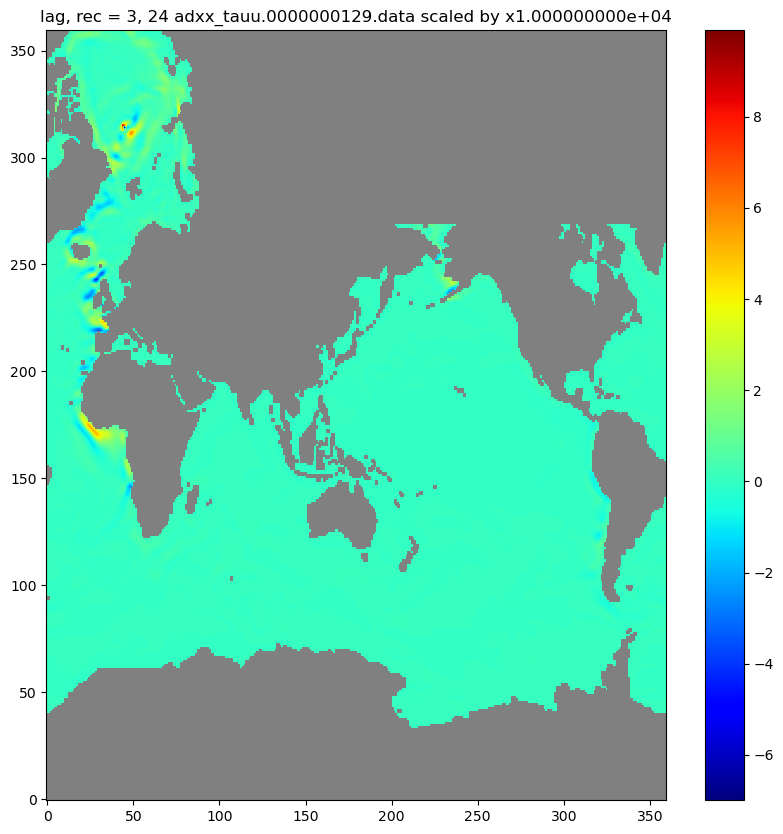

In [8]:
lib_python.plt_state2d(adj2d_all[3], pinfo)

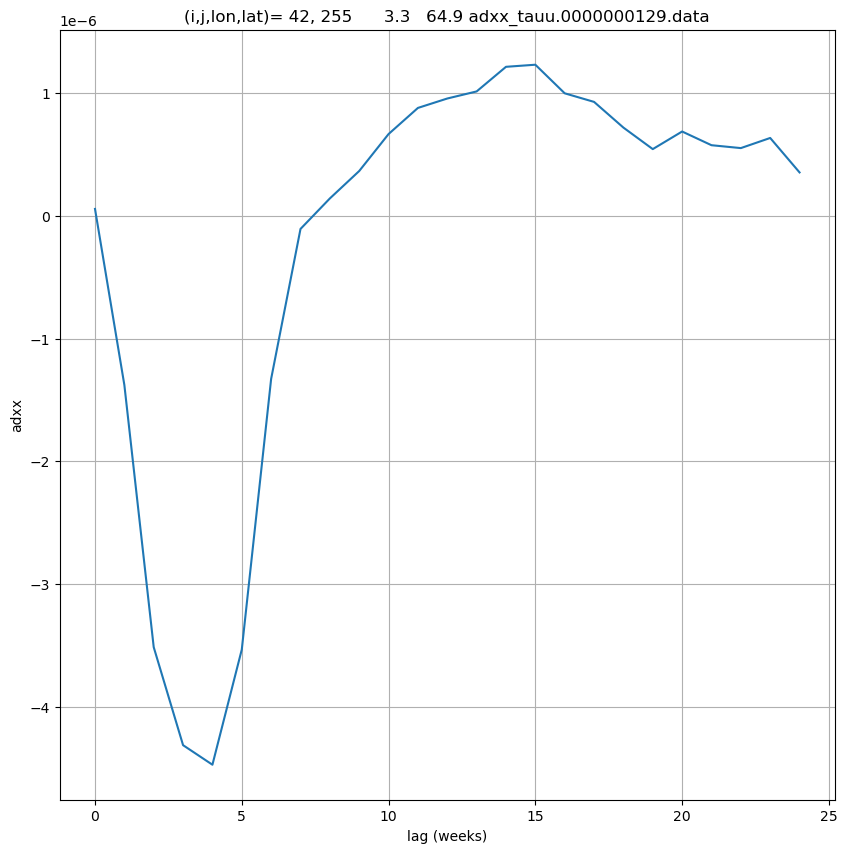

In [9]:
plot_adj.plot_adj_vs_lag(ww, adj2d_all[:,255-1,42-1], ftitle)